<a href="https://colab.research.google.com/github/wongalex349/BigDataAnalytics/blob/master/NationalHealthandExaminationSurvey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import pandas as pd

In [2]:
from google.colab import drive #importing onto google drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
a = '/content/drive/My Drive/health/demographic.csv'
b = '/content/drive/My Drive/health/diet.csv'
c = '/content/drive/My Drive/health/examination.csv'
d = '/content/drive/My Drive/health/labs.csv'
f = '/content/drive/My Drive/health/questionnaire.csv'
demo = pd.read_csv(a)
diet = pd.read_csv(b)
exam = pd.read_csv(c)
labs = pd.read_csv(d)
ques = pd.read_csv(f)

In [4]:
demo.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
count,10175.000000,10175.0,10175.000000,10175.000000,10175.000000,673.000000,10175.000000,10175.000000,9813.000000,4213.000000,6261.000000,543.000000,10175.000000,10171.000000,1908.000000,2803.000000,5769.000000,5769.000000,1309.000000,10175.000000,10174.000000,10175.000000,10054.000000,10054.000000,10054.000000,7311.000000,7312.000000,7313.000000,6317.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,9878.000000,9881.000000,10052.000000,5342.000000,10175.000000,10175.000000,10175.000000,10175.000000,10042.000000,10052.000000,9390.000000
mean,78644.000000,8.0,1.964423,1.508305,31.484128,10.341753,3.091892,3.289828,1.508509,107.478519,1.914071,1.493554,1.227027,1.097532,8.837526,6.162326,3.518807,2.571850,2.022154,1.105651,1.630725,1.966388,1.063358,1.998707,1.969067,1.055670,1.993435,1.966225,1.099414,3.874693,3.730418,0.542899,1.008354,0.396560,1.499951,45.957740,1.393197,3.502378,2.735078,3.612879,30585.180933,30585.180933,1.484128,110.926880,10.884983,10.505969,2.252153
std,2937.413829,0.0,0.185243,0.499956,24.421651,6.885479,1.263305,1.613241,0.499953,69.774776,0.288704,0.594761,1.830533,0.341097,17.593642,5.861571,1.236032,2.626299,0.347949,0.307406,0.482632,0.180237,0.243618,0.035937,0.173145,0.229298,0.080761,0.180663,0.335650,1.722184,1.775085,0.814831,1.193006,0.704731,0.500025,15.635581,2.676527,1.251080,5.922690,1.321508,26948.427403,27941.005388,0.499773,4.260322,13.878864,13.643064,1.634907
min,73557.000000,8.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,3697.772098,0.000000,1.000000,104.000000,1.000000,1.000000,0.000000
25%,76100.500000,8.0,2.000000,1.000000,10.000000,5.000000,2.000000,2.000000,1.000000,45.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,34.000000,1.000000,3.000000,1.000000,3.000000,12754.485277,12561.598665,1.000000,107.000000,5.000000,5.000000,0.870000
50%,78644.000000,8.0,2.000000,2.000000,26.000000,9.000000,3.000000,3.000000,2.000000,103.000000,2.000000,1.000000,1.000000,1.000000,5.000000,5.000000,4.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000,4.000000,0.000000,1.000000,0.000000,1.000000,43.000000,1.000000,4.000000,1.000000,4.000000,20232.999616,20174.573544,1.000000,111.000000,8.000000,7.000000,1.705000
75%,81187.500000,8.0,2.000000,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,166.000000,2.000000,2.000000,1.000000,1.000000,7.000000,9.000000,5.000000,5.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,5.000000,5.000000,1.000000,2.000000,1.000000,2.000000,56.000000,2.000000,4.000000,4.000000,5.000000,36280.427224,36748.217798,2.000000,115.000000,14.000000,14.000000,3.607500
max,83731.000000,8.0,2.000000,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,7.000000,9.000000,99.000000,9.000000,99.000000,99.000000,9.000000,99.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,7.000000,7.000000,3.000000,4.000000,3.000000,2.000000,80.000000,77.000000,9.000000,9

In [5]:
diet.describe()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,...,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
count,9813.000000,9813.000000,8661.000000,9813.000000,8783.000000,8661.000000,8661.000000,8706.000000,8783.000000,8797.000000,8653.000000,8628.000000,8783.000000,5399.000000,8783.000000,8783.000000,1448.000000,8783.000000,523.0,131.0,121.0,37.0,0.0,4.0,146.0,34.0,67.0,22.0,31.0,8.0,75.0,8661.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.00000,8531.000000,8531.000000,...,1890.000000,5121.000000,118.000000,5121.000000,827.000000,5121.000000,559.000000,5121.000000,257.000000,5121.000000,192.00000,5121.000000,96.000000,5121.000000,108.000000,5121.000000,12.000000,5121.000000,147.000000,5121.000000,35.000000,5121.000000,1774.000000,5121.000000,215.000000,5121.000000,87.000000,5121.000000,10.000000,5121.000000,61.000000,5121.000000,171.000000,5121.000000,27.000000,5121.000000,1318.000000,5121.000000,317.000000,5120.0
mean,78644.559971,31713.463364,35931.672555,1.472027,43.793351,1.984528,1.874495,16.176085,4.501423,1.156303,1.357795,11.419448,3.578504,1.652899,3.178754,1.884550,2.180249,1.919048,1.0,2.0,3.0,4.0,NaN,6.0,7.0,8.0,9.0,10.0,11.0,12.0,91.0,15.170766,1964.538624,74.536708,242.737141,109.302640,15.278045,75.09880,24.764254,25.833632,...,2.480423,1.976958,2.110169,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.187500,1.978910,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.500000,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2.0
std,2938.592266,36061.598495,51017.340117,1.260325,20.535725,0.123426,0.331310,11.804355,2.184283,0.555685,1.481441,4.048492,11.600264,0.811360,1.182280,0.705328,10.243948,0.606411,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.889459,984.493064,44.723181,123.956800,73.340526,10.132656,45.50421,15.883314,16.829673,...,2.427975,0.150053,2.045566,0.368020,1.642180,0.311868,1.469040,0.218349,2.126966,0.189984,1.40178,0.135641,1.991099,0.143697,0.972982,0.048356,0.778499,0.166993,1.998182,0.082397,1.360919,0.475874,2.273527,0.200572,2.313009,0.129242,1.168050,0.044151,0.849837,0.108500,1.443660,0.179675,1.184814,0.072427,2.651130,0.437229,2.793016,0.241001,2.997953,0.0
min,73557.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,-31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.0,3.0,4.0,NaN,6.0,7.0,8.0,9.0,10.0,11.0,12.0,91.0,1.000000,117.000000,0.000000,8.670000,0.130000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,76092.000000,8731.762120,7255.716712,1.000000,25.000000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,13.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.0,2.0,3.0,4.0,NaN,6.0,7.0,8.0,9.0,10.0,11.0,12.0,91.0,11.000000,1309.500000,45.780000,158.720000,61.180000,8.500000,43.71500,13.820000,14.488500,...,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.00000,2.000000,1.000

In [6]:
exam.describe()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,...,OHX31SE,CSXEXSTS,CSXEXCMT,CSQ245,CSQ241,CSQ260A,CSQ260D,CSQ260G,CSQ260I,CSQ260N,CSQ260M,CSQ270,CSQ450,CSQ460,CSQ470,CSQ480,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
count,9813.000000,9813.000000,9508.000000,320.000000,1961.000000,7535.000000,7542.000000,7549.000000,9511.000000,7564.000000,7553.000000,7172.000000,7172.000000,7539.000000,7409.000000,7409.000000,7537.000000,7408.000000,7408.000000,7537.000000,515.000000,515.000000,562.000000,9813.000000,9723.000000,384.000000,1065.000000,31.0,229.000000,0.0,9067.000000,221.000000,9055.000000,3523.000000,7402.000000,350.0,9301.000000,368.0,9301.000000,372.0,...,3264.000000,3708.00000,208.000000,3557.000000,979.000000,182.000000,74.0,283.0,105.0,421.0,2754.0,283.000000,3420.000000,3416.000000,3412.000000,3411.000000,3411.000000,3133.000000,3133.000000,3129.000000,3217.000000,3114.000000,3114.000000,3217.000000,3217.000000,3218.000000,3218.000000,3527.000000,3525.000000,3523.000000,3520.000000,3520.000000,3519.000000,3519.000000,3519.000000,1595.000000,1595.000000,1613.000000,1613.000000,3537.000000
mean,78644.559971,1.064914,660.584034,57.828125,105.534931,1.008096,3.675418,74.416214,1.013668,1.004363,144.673640,118.123536,65.769939,1.988725,118.230530,65.237954,1.953960,117.999460,65.035637,1.963381,125.666019,69.013592,1.879004,1.139916,62.599054,2.966146,81.631174,1.0,41.566812,NaN,155.883759,2.647059,25.678244,2.488504,38.577709,1.0,33.141006,1.0,28.485765,1.0,...,5.472426,1.20658,45.264423,2.220692,2.006129,1.197802,1.0,1.0,1.0,1.0,1.0,1.533569,21.350877,41.078454,29.803634,11.464966,60.949575,14.851580,3.007980,26.926174,1.465962,53.207450,2.250803,52.060305,1.064346,33.083282,1.241765,2.151971,1.427518,2.902924,2.815625,1.145170,2.155726,2.992327,3.751066,55.746708,1.066458,31.526348,1.199008,1.709075
std,2938.592266,0.354007,275.431642,30.788160,21.516295,0.116644,0.786221,12.367969,0.116116,0.065911,36.583686,18.078149,14.960108,0.105589,18.181197,15.700239,0.209585,18.079852,16.233174,0.187838,22.608087,15.806398,0.326414,0.499377,32.331616,0.480861,14.219097,0.0,2.525734,NaN,23.176270,0.764171,7.955137,0.825881,4.047820,0.0,7.409420,0.0,7.961971,0.0,...,4.346384,0.49594,33.353795,1.242045,0.285941,1.191311,0.0,0.0,0.0,0.0,0.0,0.804313,13.788832,17.795413,16.673318,10.198248,21.639199,14.788807,1.045088,16.749107,1.148832,22.730844,0.709063,22.565936,0.438252,19.412651,0.792784,0.531093,0.877375,0.480984,0.613697,0.548531,0.667754,0.318464,0.693496,24.649127,0.441677,20.925161,0.690739,0.898975
min,73557.000000,1.000000,7.000000,1.000000,60.000000,1.000000,1.000000,40.000000,1.000000,1.000000,100.000000,66.000000,0.000000,1.000000,66.000000,0.000000,1.000000,62.000000,0.000000,1.000000,80.000000,0.000000,1.000000,1.000000,3.100000,1.000000,48.600000,1.0,33.800000,NaN,79.700000,1.000000,12.100000,1.000000,24.400000,1.0,9.900000,1.0,10.400000,1.0,...,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,76092.000000,1.000000,578.000000,56.000000,88.000000,1.000000,3.000000,66.000000,1.000000,1.000000,130.000000,106.000000,58.000000,2.000000,106.000000,58.000000,2.000000,106.000000,58.000000,2.000000,108.000000,60.000000,2.000000,1.000000,37.950000,3.000000,69.700000,1.0,39.700000,NaN,149.500000,3.000000,19.700000,2.000000,36.000000,1.0,30.50

In [7]:
labs.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,...,URXUMMA,URDUMMAL,URXVOL1,URDFLOW1,URXVOL2,URDFLOW2,URXVOL3,URDFLOW3,URXUHG,URDUHGLC,URXUBA,URDUBALC,URXUCD,URDUCDLC,URXUCO,URDUCOLC,URXUCS,URDUCSLC,URXUMO,URDUMOLC,URXUMN,URDUMNLC,URXUPB,URDUPBLC,URXUSB,URDUSBLC,URXUSN,URDUSNLC,URXUSR,URDUSRLC,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,6553.000000,6552.000000,6551.000000,6551.000000,6553.000000,6553.000000,6553.000000,6511.000000,6511.000000,6551.000000,6551.000000,6542.000000,6553.000000,6553.000000,6553.000000,6544.000000,6544.000000,6553.000000,6553.000000,6552.000000,6527.000000,6527.000000,6552.000000,6551.000000,6553.000000,6553.000000,6552.000000,6552.000000,6549.000000,6549.000000,...,2654.000000,2654.000000,8057.000000,7150.000000,1856.000000,1855.000000,99.000000,99.000000,2666.000000,2666.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.0,2664.000000,2664.0,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,1261.000000,2662.000000,5316.000000,5316.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,42.820845,78.578907,25.117845,24.069913,12.863269,4.592582,25.168167,9.486377,2.371594,184.505877,4.771333,153.986090,104.309171,0.880172,77.807255,2.826039,28.260391,102.290859,5.678097,26.081197,83.445534,14.946131,4.026923,126.801710,139.782542,279.273615,3.929405,1.268801,0.639235,10.930919,...,0.621420,0.295403,109.113069,0.907887,118.483297,1.255776,96.343434,1.775141,0.506489,0.335709,1.768477,0.002628,0.242220,0.181306,0.624201,0.000751,4.967304,0.0,56.102215,0.0,0.160595,0.695195,0.460113,0.010511,0.075613,0.224850,1.441414,0.094595,118.066184,0.000375,0.186950,0.007883,0.150535,0.162162,0.012038,0.177177,1.969072,15.670639,640.100263,472.394865
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,3.436491,51.614841,17.740698,18.484877,5.993834,2.139780,2.269895,0.367961,0.091990,41.977990,1.085560,185.262311,2.745838,0.487262,43.074036,0.441439,4.414388,38.724165,2.149616,42.896888,36.395317,6.518856,0.354320,32.064128,2.216775,5.023304,0.651231,0.210288,0.308691,5.278621,...,0.688717,0.456310,82.487715,0.954769,93.150898,2.141072,83.380877,1.771576,2.041355,0.472326,3.004718,0.051203,0.364897,0.385344,1.782484,0.027395,3.143092,0.0,56.115836,0.0,0.485937,0.460411,0.766444,0.102000,0.141326,0.417562,4.711833,0.292709,182.793685,0.019375,0.133833,0.088452,0.576409,0.368669,0.034026,0.381890,0.251651,46.735936,751.967084,554.951537
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,24.000000,9.000000,9.000000,6.000000,1.000000,0.360000,16.000000,7.600000,1.900000,72.000000,1.862000,6.000000,83.000000,0.290000,25.640000,1.400000,14.000000,49.000000,2.720000,4.000000,5.000000,0.900000,2.800000,38.000000,119.000000,237.000000,1.800000,0.581000,0.100000,1.710000,...,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.042000,0.090000,0.000000,0.042000,0.000000,0.025000,0.000000,0.016000,0.000000,0.387000,0.0,1.430000,0.0,0.092000,0.000000,0.020000,0.000000,0.016000,0.000000,0.064000,0.000000,1.655000,0.000000,0.013000,0.000000,0.013000,0.000000,0.001400,0.000000,1.000000,0.280000,18.000000,13.300000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,41.000000,5

In [8]:
ques.describe()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ056,BPD058,BPQ059,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,10175.000000,5759.0,16.0,171.0,2374.000000,1007.000000,5421.000000,1631.000000,4479.000000,3593.000000,3596.000000,3595.000000,1464.000000,4477.000000,1866.000000,6464.000000,2174.000000,2164.000000,2174.000000,1815.000000,6464.000000,1579.000000,6464.000000,6464.000000,4427.000000,4620.000000,4620.000000,1450.000000,10052.000000,10043.000000,10052.000000,10052.000000,10052.000000,6467.000000,8475.000000,8475.000000,8475.000000,5769.000000,260.000000,5768.000000,...,3480.000000,1682.000000,1790.000000,1899.000000,6439.000000,6430.000000,6464.000000,6464.000000,6422.000000,1239.000000,5674.000000,1693.0,883.0,802.0,1830.0,399.0,233.0,115.0,114.0,84.0,200.0,26.0,1033.0,175.0,689.0,19.0,1121.0,1022.0,943.0,996.0,15.0,29.0,4179.000000,5024.000000,2765.000000,6103.000000,6020.000000,1478.000000,1478.000000,1478.000000
mean,78644.000000,1.0,8.0,9.0,3.101095,2.956306,1.311197,1.594727,4.709310,1.921514,3.511123,4.065925,2.326503,1.837168,1.224544,1.669090,1.226311,58.845656,1.171573,1.130028,1.757890,150.069031,1.867420,1.723855,1.660267,1.616234,1.696753,1.235862,20255.040092,22629.867669,7130.036809,19586.698866,7043.604158,2.768053,1.831032,1.937699,1.979941,1.959785,6.796154,2.022191,...,1.994828,1.318074,1.162011,1.273828,163.173785,254.215863,1.958385,2.237624,312.522579,1.369653,1.641346,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,31.0,32.0,33.0,34.0,30.0,41.0,42.0,43.0,44.0,45.0,46.0,35.0,40.0,412.158411,568.528463,377.322966,315.623464,571.309635,2.583221,2.299729,1.746955
std,2937.413829,0.0,0.0,0.0,1.511821,1.733794,0.545023,0.615303,34.428362,0.853701,28.866122,45.410645,0.844722,0.385823,23.236249,0.514554,0.617529,109.916154,0.440162,0.379544,0.448164,599.215646,0.345923,0.715436,1.472373,1.069422,0.544243,0.578744,138337.301040,147786.437306,82577.738048,137063.758433,82346.643034,0.970974,0.486790,0.385160,0.419125,0.278279,12.081160,1.662798,...,0.236086,0.567214,0.852123,0.949075,974.668742,865.667138,1.015111,0.634874,1142.807847,0.527667,0.499804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1508.005974,1977.085854,1726.344740,1077.068750,7269.067701,0.784612,1.213281,0.709430
min,73557.000000,1.0,8.0,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,48.000000,75.000000,1.000000,1.000000,75.000000,1.000000,1.000000,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,31.0,32.0,33.0,34.0,30.0,41.0,42.0,43.0,44.0,45.0,46.0,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76100.500000,1.0,8.0,9.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,35.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,257.000000,0.000000,0.000000,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,63.000000,143.000000,1.000000,2.000000,140.000000,1.000000,1.000000,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,31.0,32.0,33.0,34.0,30.0,41.0,42.0,43.0,44.0,45.0,46.0,35.0,40.0,140.000000,125.000000,63.

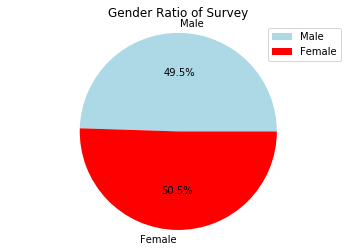

In [9]:
# gender ratio of the survey
#do not know what is 1 or 2
y = demo[['RIAGENDR']];
x_M = y[y.RIAGENDR == 1].RIAGENDR.count();
x_F = y[y.RIAGENDR == 2].RIAGENDR.count();
labels = 'Male','Female'
x = y.count();

perc_M = int(x_M/x * 100)
perc_F = int(x_F/x * 100)
size = [perc_M,perc_F]
colors = ['lightblue','red']
plt.pie(size, labels = labels, colors = colors,autopct='%1.1f%%')
plt.legend(labels)
plt.title('Gender Ratio of Survey')
plt.axis('equal')
plt.show()


count    10175.000000
mean        31.484128
std         24.421651
min          0.000000
25%         10.000000
50%         26.000000
75%         52.000000
max         80.000000
Name: RIDAGEYR, dtype: float64

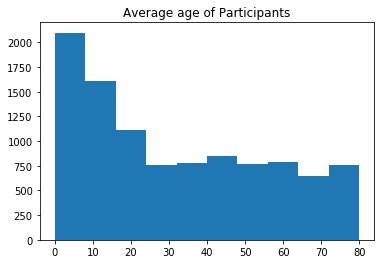

In [10]:
y = demo[['RIDAGEYR']];
x = demo.RIDAGEYR
plt.title('Average age of Participants')
plt.hist(x)
x.describe()

Text(0.5, 1.0, 'Race of Individuals')

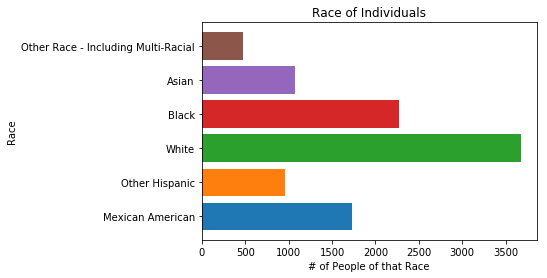

In [11]:
#Race of applicants
y = demo[['RIDRETH3']];
one = y[y.RIDRETH3 == 1].RIDRETH3.count();
two = y[y.RIDRETH3 == 2].RIDRETH3.count();
three = y[y.RIDRETH3 == 3].RIDRETH3.count();
four = y[y.RIDRETH3 == 4].RIDRETH3.count();
six = y[y.RIDRETH3 == 6].RIDRETH3.count();
seven = y[y.RIDRETH3 == 7].RIDRETH3.count();

plt.barh('Mexican American',one)
plt.barh('Other Hispanic',two)
plt.barh('White',three)
plt.barh('Black',four)
plt.barh('Asian',six)
plt.barh('Other Race - Including Multi-Racial',seven)


plt.ylabel('Race')
plt.xlabel('# of People of that Race')
plt.title('Race of Individuals')

Text(0.5, 1.0, 'Annual Family Income')

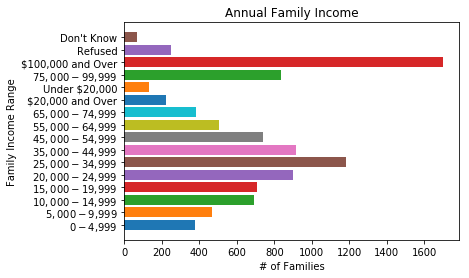

In [12]:
y = demo[['INDFMIN2']];
one = y[y.INDFMIN2 == 1].INDFMIN2.count();
two = y[y.INDFMIN2 == 2].INDFMIN2.count();
three = y[y.INDFMIN2 == 3].INDFMIN2.count();
four = y[y.INDFMIN2 == 4].INDFMIN2.count();
five = y[y.INDFMIN2 == 5].INDFMIN2.count();
six = y[y.INDFMIN2 == 6].INDFMIN2.count();
seven = y[y.INDFMIN2 == 7].INDFMIN2.count();
eight = y[y.INDFMIN2 == 8].INDFMIN2.count();
nine = y[y.INDFMIN2 == 9].INDFMIN2.count();
ten = y[y.INDFMIN2 == 10].INDFMIN2.count();
twelve = y[y.INDFMIN2 == 12].INDFMIN2.count();
thirteen = y[y.INDFMIN2 == 13].INDFMIN2.count();
fourteen = y[y.INDFMIN2 == 14].INDFMIN2.count();
fifteen = y[y.INDFMIN2 == 15].INDFMIN2.count();
seventyseven = y[y.INDFMIN2 == 77].INDFMIN2.count();
ninetynine = y[y.INDFMIN2 == 99].INDFMIN2.count();

plt.barh('$0 - $4,999',one)
plt.barh('$5,000 - $9,999',two)
plt.barh('$10,000 - $14,999',three)
plt.barh('$15,000 - $19,999',four)
plt.barh('$20,000 - $24,999',five)
plt.barh('$25,000 - $34,999',six)
plt.barh('$35,000 - $44,999',seven)
plt.barh('$45,000 - $54,999',eight)
plt.barh('$55,000 - $64,999',nine)
plt.barh('$65,000 - $74,999',ten)
plt.barh('$20,000 and Over',twelve)
plt.barh('Under $20,000',thirteen)
plt.barh('$75,000 - $99,999',fourteen)
plt.barh('$100,000 and Over',fifteen)
plt.barh('Refused',seventyseven)
plt.barh('Don\'t Know',ninetynine)

plt.ylabel('Family Income Range')
plt.xlabel('# of Families')
plt.title('Annual Family Income')


Text(0.5, 1.0, 'Average Systolic Blood Pressure of people in mm Hg')

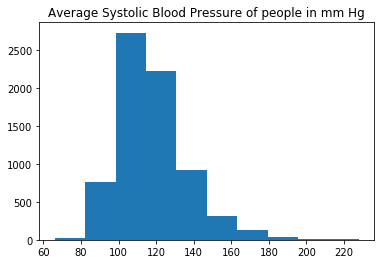

In [13]:
#It measures the force of blood against your artery walls while your ventricles — the lower two chambers of your heart — squeeze, pushing blood out to the rest of your body.
x = exam.BPXSY1.dropna();
plt.hist(x);
plt.ylabel("# of Individuals")
plt.xlabel("Systolic Blood Pressure (mm Hg)")
plt.title("Average Systolic Blood Pressure of people in mm Hg")

Text(0.5, 1.0, 'Average Diastolic Blood Pressure of people in mm Hg')

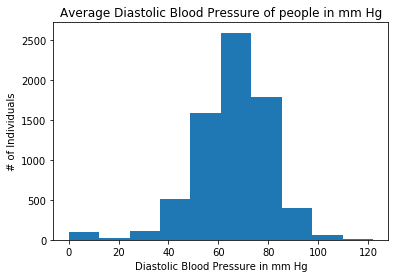

In [27]:
#It measures the force of blood against your artery walls as your heart relaxes and the ventricles are allowed to refill with blood.
x = exam.BPXDI1.dropna();
plt.hist(x);
plt.ylabel("# of Individuals")
plt.xlabel("Diastolic Blood Pressure in mm Hg")
plt.title("Average Diastolic Blood Pressure of people in mm Hg")

Text(0.5, 0, 'Weight(lbs)')

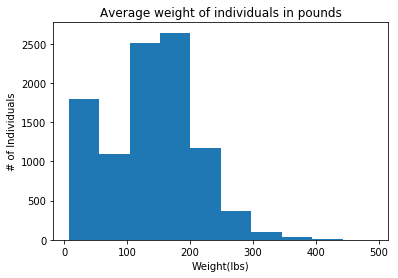

In [26]:
x = exam.BMXWT.dropna() * 2.20462;
plt.hist(x);
plt.title("Average weight of individuals in pounds")
plt.ylabel("# of Individuals")
plt.xlabel("Weight(lbs)")

Text(0.5, 0, 'Height(ft)')

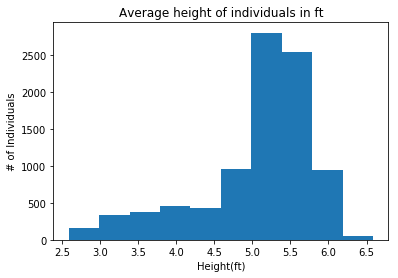

In [25]:
x = (exam.BMXHT.dropna() * .39)/ 12;
plt.hist(x);
plt.title("Average height of individuals in ft")
plt.ylabel("# of Individuals")
plt.xlabel("Height(ft)")

Text(0.5, 1.0, 'Creatinine in blood measured in mg/dl')

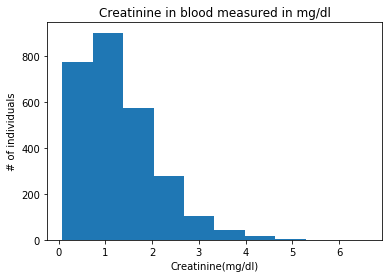

In [30]:
#creatinine is the waste found when creatine breaks down in your body. Doctors use it to measure the health of people's kidneys
#average is about .6 to 1.3 mg/dl
x = (labs.URXUCR.dropna() /100);
plt.hist(x);
plt.ylabel("# of individuals")
plt.xlabel("Creatinine(mg/dl)")
plt.title("Creatinine in blood measured in mg/dl")


Text(0.5, 1.0, 'Whether test subjects had Chlamydia')

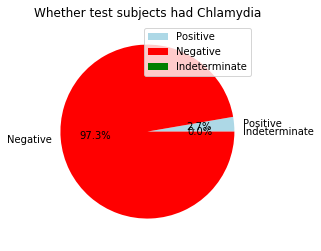

In [18]:
#Test for Chlamydia from urine
y = labs[['URXUCL']];
x_P = y[y.URXUCL == 1].URXUCL.count();
x_N = y[y.URXUCL == 2].URXUCL.count();
x_I = y[y.URXUCL == 3].URXUCL.count();
labels = 'Positive','Negative','Indeterminate'
size = [x_P,x_N,x_I]
colors = ['lightblue','red','green']
plt.pie(size, labels = labels, colors = colors,autopct='%1.1f%%')
plt.legend(labels)
plt.title("Whether test subjects had Chlamydia")

Text(0.5, 1.0, 'Whether test subjects had HIV')

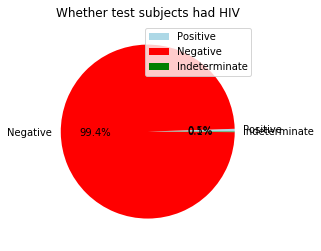

In [82]:
#Test for HIV from urine
y = labs[['LBDHI']];
x_P = y[y.LBDHI == 1].LBDHI.count();
x_N = y[y.LBDHI == 2].LBDHI.count();
x_I = y[y.LBDHI == 3].LBDHI.count();
labels = 'Positive','Negative','Indeterminate'
size = [x_P,x_N,x_I]
colors = ['lightblue','red','green']
plt.pie(size, labels = labels, colors = colors,autopct='%1.1f%%')
plt.legend(labels)
plt.title("Whether test subjects had HIV")

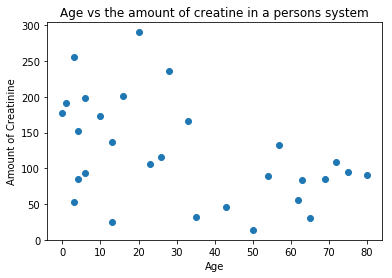

In [20]:
#Age vs creatinine
y = labs[['URXUCR']][0:100];
t = demo[['RIDAGEYR']][0:100];
plt.xlabel('Age')
plt.ylabel('Amount of Creatinine')
plt.title('Age vs the amount of creatine in a persons system')
plt.scatter(t,y)

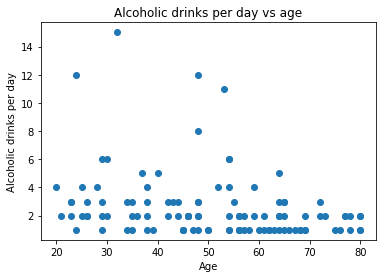

In [38]:
y = ques[['ALQ130']][0:300]
x = demo[['RIDAGEYR']][0:300];
plt.xlabel("Age")
plt.ylabel("Alcoholic drinks per day")
plt.title("Alcoholic drinks per day vs age")
plt.scatter(x,y)

Text(0.5, 1.0, 'How often do people smoke')

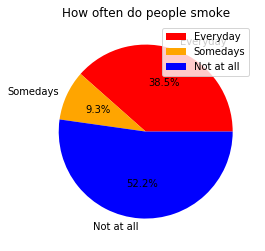

In [22]:
y = ques[['SMQ040']];
x_P = y[y.SMQ040 == 1].SMQ040.count();
x_N = y[y.SMQ040 == 2].SMQ040.count();
x_I = y[y.SMQ040 == 3].SMQ040.count();
labels = 'Everyday','Somedays','Not at all'
size = [x_P,x_N,x_I]
colors = ['red','orange','blue']
plt.pie(size, labels = labels, colors = colors,autopct='%1.1f%%')
plt.legend(labels)
plt.title("How often do people smoke")

Text(0.5, 1.0, 'Do you work out?')

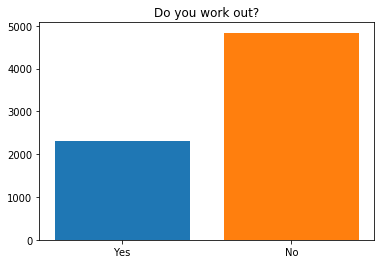

In [65]:
y = ques[['PAQ620']];
one = y[y.PAQ620 == 1].PAQ620.count();
two = y[y.PAQ620 == 2].PAQ620.count();
plt.bar("Yes",one)
plt.bar("No",two)
plt.title("Do you work out?")


Text(0.5, 1.0, 'Number of days of workout per week')

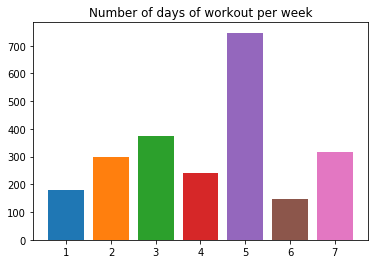

In [70]:


y = ques[['PAQ625']];
one = y[y.PAQ625 == 1].PAQ625.count();
two = y[y.PAQ625 == 2].PAQ625.count();
three = y[y.PAQ625 == 3].PAQ625.count();
four = y[y.PAQ625 == 4].PAQ625.count();
five = y[y.PAQ625 == 5].PAQ625.count();
six = y[y.PAQ625 == 6].PAQ625.count();
seven = y[y.PAQ625 == 7].PAQ625.count();
plt.bar("1",one)
plt.bar("2",two)
plt.bar("3",three)
plt.bar("4",four)
plt.bar("5",five)
plt.bar("6",six)
plt.bar("7",seven)
plt.title("Number of days of workout per week")

Text(0.5, 1.0, 'Tried marijuana')

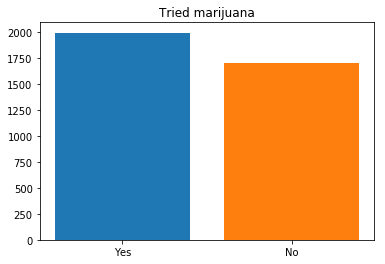

In [69]:
y = ques[['DUQ200']];
one = y[y.DUQ200 == 1].DUQ200.count();
two = y[y.DUQ200 == 2].DUQ200.count();
plt.bar("Yes",one)
plt.bar("No",two)
plt.title("Tried marijuana")

Text(0.5, 1.0, 'How much marijuana per month')

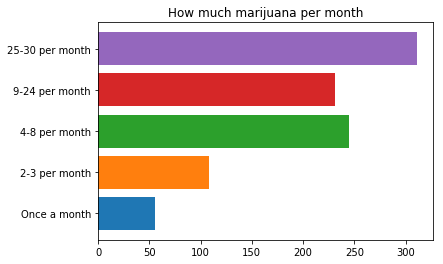

In [73]:
y = ques[['DUQ217']];
one = y[y.DUQ217 == 1].DUQ217.count();
two = y[y.DUQ217 == 2].DUQ217.count();
three = y[y.DUQ217 == 3].DUQ217.count();
four = y[y.DUQ217 == 4].DUQ217.count();
five = y[y.DUQ217 == 5].DUQ217.count();
plt.barh("Once a month",one)
plt.barh("2-3 per month",two)
plt.barh("4-8 per month",three)
plt.barh("9-24 per month",four)
plt.barh("25-30 per month",five)
plt.title("How much marijuana per month")

Text(0.5, 0, 'Number of days per month')

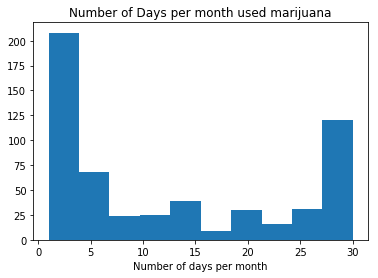

In [72]:
x = (ques.DUQ230.dropna());
plt.hist(x);
plt.title("Number of Days per month used marijuana")
plt.xlabel("Number of days per month")

Text(0.5, 1.0, '# of days smoked in the last 5 days')

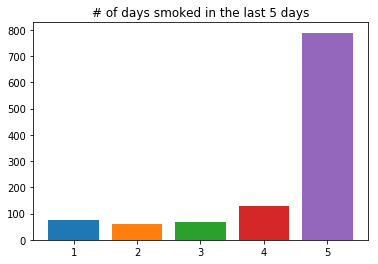

In [81]:
y = ques[['SMQ710']];
one = y[y.SMQ710 == 1].SMQ710.count();
two = y[y.SMQ710 == 2].SMQ710.count();
three = y[y.SMQ710 == 3].SMQ710.count();
four = y[y.SMQ710 == 4].SMQ710.count();
five = y[y.SMQ710 == 5].SMQ710.count();
plt.bar("1",one)
plt.bar("2",two)
plt.bar("3",three)
plt.bar("4", four)
plt.bar("5",five)
plt.title("# of days smoked in the last 5 days")